In [40]:
from comut import comut
import pandas as pd
import palettable
import numpy as np
import os
os.chdir('/home/jupyter/scATAC_analysis/edit')

# Figure 1A: Cohort overview

In [28]:
metadata = pd.read_excel('snatac-rcc-manuscript-data/table_S1.xlsb', sheet_name='B', skiprows=1)

In [39]:
metadata['participant'] = metadata['participant'].map(str).apply(lambda x: '0' + x if x.startswith('6') else x)

for cohort in metadata['cohort'].unique():
    cohort_data = metadata.loc[metadata['cohort'] == cohort]
    num_patients = len(cohort_data['participant'].unique())
    num_cells = cohort_data.shape[0]
    print(f"{cohort} cohort number of patients: {num_patients}")
    print(f"{cohort} cohort number of cells: {num_cells}")


Wu et al Nat Comm 2023 cohort number of patients: 23
Wu et al Nat Comm 2023 cohort number of cells: 67678
Internal cohort number of patients: 13
Internal cohort number of cells: 68014
Long et al Cell Discov 2022 cohort number of patients: 3
Long et al Cell Discov 2022 cohort number of cells: 11582
Yu et al Cancer Res 2023 cohort number of patients: 19
Yu et al Cancer Res 2023 cohort number of cells: 30571


# Figure 1B: Comutation plot

Generating comut-expected format for categorical data. 

In [42]:
# cell metadata
metadata = pd.read_excel('snatac-rcc-manuscript-data/table_S1.xlsb', sheet_name='B', skiprows=1)
metadata['participant'] = metadata['participant'].map(str).apply(lambda x: '0' + x if x.startswith('6') else x)

## Clinical data
- Originating cohort
- Sex
- Age
- Grade
- Stage
- Histology
- Biopsy site

In [43]:
cohort = metadata[['biopsy', 'cohort']].drop_duplicates()
mapping = {
    'wuetal':'Wu et al Nat Comm 2023',
    'longetal': 'Long et al Cell Discov 2022',
    'yuetal' : 'Yu et al Cancer Res 2023'
}
cohort['cohort'] = cohort['cohort'].replace(mapping)
cohort.columns = ['sample', 'value']
cohort['category'] = 'Cohort'
cohort.head()

,sample,value,category
0,C3L-00004-01,Wu et al Nat Comm 2023,Cohort
3580,C3L-00010-01,Wu et al Nat Comm 2023,Cohort
4133,C3L-00026-01,Wu et al Nat Comm 2023,Cohort
9218,C3L-00079-01,Wu et al Nat Comm 2023,Cohort
12064,C3L-00088,Wu et al Nat Comm 2023,Cohort


In [45]:
metadata

,cell_barcodes,sample,biopsy,participant,dbgap_subjectid,dbgap_sampleid,doublet_score,sex,age_at_diagnosis,fuhrman_grade,...,chrXq,chrYq,chrXp,chr21p,chr22p,blacklist_fraction,nucleosome_signal,TSS.enrichment,FRiP,peak_region_fragments
0,C3L-00004-01_GGGCCATGTTCTACCC-1,C3L-00004-01,C3L-00004-01,C3L-00004,NaN,NaN,0.123358,1,72,3,...,1.888227,1.793084,NaN,NaN,NaN,0.008462,0.529934,5.189575,0.624010,29405.814156
1,C3L-00004-01_TCACCACGTACAAGCG-1,C3L-00004-01,C3L-00004-01,C3L-00004,NaN,NaN,0.135753,1,72,3,...,1.888227,1.793084,NaN,NaN,NaN,0.006627,0.544588,5.637728,0.775467,21505.900835
2,C3L-00004-01_TCCCACACACGGTTAT-1,C3L-00004-01,C3L-00004-01,C3L-00004,NaN,NaN,0.003837,1,72,3,...,1.888227,1.793084,NaN,NaN,NaN,0.006558,0.532739,4.537974,0.588988,27165.668892
3,C3L-00004-01_CCCTCTCGTAAAGGCC-1,C3L-00004-01,C3L-00004-01,C3L-00004,NaN,NaN,0.118393,1,72,3,...,1.888227,1.793084,NaN,NaN,NaN,0.007877,0.536863,5.393919,0.629628,23747.047838
4,C3L-00004-01_TAGGAGGCAATGTAAG-1,C3L-00004-01,C3L-00004-01,C3L-00004,NaN,NaN,0.009539,1,72,3,...,1.888227,1.793084,NaN,NaN,NaN,0.007144,0.374611,6.469055,0.863580,21806.306145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177840,rcc_0600876_T1_TTTGTGTAGGATTAAC-1,rcc_0600876_T1,rcc_0600876_T1,0600876,0600876_T1,rcc_0600876_T1,0.148130,0,68,4,...,2.093998,NaN,1.884905,NaN,NaN,0.005783,0.823278,4.900241,0.742102,35746.678387
177841,rcc_0600876_T1_TTTGTGTCACAAACAA-1,rcc_0600876_T1,rcc_0600876_T1,0600876,0600876_T1,rcc_0600876_T1,0.133667,0,68,4,...,2.093998,NaN,1.884905,NaN,NaN,0.005245,0.691074,4.425049,0.755991,39225.618885
177842,rcc_0600876_T1_TTTGTGTCATCCGTAA-1,rcc_0600876_T1,rcc_0600876_T1,0600876,0600876_T1,rcc_0600876_T1,0.150064,0,68,4,...,2.093998,NaN,1.884905,NaN,NaN,0.006188,0.930011,4.337056,0.685049,32264.475361
177843,rcc_0600876_T1_TTTGTGTTCCGAGAGA-1,rcc_0600876_T1,rcc_0600876_T1,0600876,0600876_T1,rcc_0600876_T1,0.051769,0,68,4,...,2.093998,NaN,1.884905,NaN,NaN,0.006329,0.721754,4.164585,0.813333,43329.080109


In [47]:
sex = metadata[['biopsy', 'sex']].drop_duplicates()
mapping = {
    1.0:'Male',
    0.0:'Female'
}
sex['sex'] = sex['sex'].map(mapping)
sex.columns = ['sample', 'value']
sex['category'] = 'Sex'
sex.head()

,sample,value,category
0,C3L-00004-01,Male,Sex
3580,C3L-00010-01,Male,Sex
4133,C3L-00026-01,Female,Sex
9218,C3L-00079-01,Male,Sex
12064,C3L-00088,Male,Sex


In [48]:
ages = metadata[['biopsy', 'age_at_diagnosis']].drop_duplicates()
ages['age_at_diagnosis'] = np.where((ages['age_at_diagnosis'] >=30) & (ages['age_at_diagnosis'] <40), '30-39',
        np.where((ages['age_at_diagnosis'] >39) & (ages['age_at_diagnosis'] <50), '40-49',
                np.where((ages['age_at_diagnosis'] >49) & (ages['age_at_diagnosis'] <60), '50-59',
                        np.where((ages['age_at_diagnosis'] >59) & (ages['age_at_diagnosis'] <70), '60-69',
                                '70+'))))
ages.columns = ['sample', 'value']
ages['category'] = 'Age'
ages.head()

,sample,value,category
0,C3L-00004-01,70+,Age
3580,C3L-00010-01,30-39,Age
4133,C3L-00026-01,60-69,Age
9218,C3L-00079-01,40-49,Age
12064,C3L-00088,70+,Age


In [49]:
grade = metadata[['biopsy', 'fuhrman_grade']].drop_duplicates()
grade['fuhrman_grade'] = grade['fuhrman_grade'].map(str)
mapping = {
    '3.0':'3',
    '4.0':'4',
    '1.0':'1'
}
grade['fuhrman_grade'] = grade['fuhrman_grade'].replace(mapping)
grade['category'] = 'Grade'
grade.columns = ['sample','value','category']
grade = grade[['sample','category','value']]
grade.replace('nan', np.NaN,inplace = True)
grade.dropna(inplace = True)
grade.head()

,sample,category,value
0,C3L-00004-01,Grade,3
3580,C3L-00010-01,Grade,3
4133,C3L-00026-01,Grade,3
9218,C3L-00079-01,Grade,3
12064,C3L-00088,Grade,2


In [50]:
stage = metadata[['biopsy', 'stage']].drop_duplicates()
stage['stage'] = stage['stage'].map(int).map(str)
stage['category'] = 'Stage'
stage.columns = ['sample','value','category']
stage = stage[['sample','category','value']]
stage.head()

,sample,category,value
0,C3L-00004-01,Stage,3
3580,C3L-00010-01,Stage,1
4133,C3L-00026-01,Stage,1
9218,C3L-00079-01,Stage,3
12064,C3L-00088,Stage,3


In [51]:
hist = metadata[['biopsy', 'histology']].drop_duplicates()
hist['category'] = 'Histology'
hist.columns = ['sample','value','category']
hist = hist[['sample','category','value']]
hist.head()

,sample,category,value
0,C3L-00004-01,Histology,Clear cell
3580,C3L-00010-01,Histology,Clear cell
4133,C3L-00026-01,Histology,Clear cell
9218,C3L-00079-01,Histology,Clear cell
12064,C3L-00088,Histology,Clear cell


In [52]:
biopsy = metadata[['biopsy', 'biopsy_site']].drop_duplicates()
biopsy['category'] = 'Biopsy site'
biopsy.columns = ['sample','value','category']
biopsy = biopsy[['sample','category','value']]
mapping = {
    'Abdomen' : 'Visceral met',
    'Liver' : 'Visceral met',
    'Lung' : 'Visceral met',
    'Adrenal' : 'Visceral met'
}
biopsy['value'] = biopsy['value'].replace(mapping)
biopsy.head()

,sample,category,value
0,C3L-00004-01,Biopsy site,Kidney
3580,C3L-00010-01,Biopsy site,Kidney
4133,C3L-00026-01,Biopsy site,Kidney
9218,C3L-00079-01,Biopsy site,Kidney
12064,C3L-00088,Biopsy site,Kidney


In [53]:
num_pts = len(metadata['participant'].unique())
print(f'The number of unique patients is {num_pts}')

The number of unique patients is 58


In [54]:
num_biopsies = len(metadata['biopsy'].unique())
print(f'The number of unique biopsies is {num_biopsies}')

The number of unique biopsies is 61


Identify which samples belong to same patient to display on comut. 

In [55]:
ids = list(range(0,58))
pts = metadata['participant'].unique()
mapping = dict(zip(pts,ids))

indicators = metadata[['biopsy', 'participant']].drop_duplicates()
indicators['indicator'] = indicators['participant'].map(mapping)
indicators.drop(['participant'], axis = 1, inplace = True)
indicators.columns = ['sample', 'group']
indicators.head()

,sample,group
0,C3L-00004-01,0
3580,C3L-00010-01,1
4133,C3L-00026-01,2
9218,C3L-00079-01,3
12064,C3L-00088,4


## Genomic data

In [64]:
mut_df = pd.read_csv('snatac-rcc-manuscript-data/comut_muts.txt', sep = '\t')
mut_df = mut_df[mut_df['biopsy'].isin(metadata['biopsy'].unique())]
mut_df.rename(columns = {'biopsy':'sample'}, inplace=True)

## Generate comut

In [76]:
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors

mut_order = ['SETD2', 'BAP1', 'KDM5C', 'PBRM1', 'VHL']
mut_mapping = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift indel': vivid_10[4], 'Splice site': vivid_10[-1],
               'Stop gained' : vivid_10[3] , 'Nonstop' : vivid_10[6], 'Unable to determine': '#ECECEC'}
grade_mapping = {'1': '#feebe2', '2': '#fbb4b9','3': '#f768a1','4': '#ae017e','1_2': '#fcc5c0'}
stage_mapping = {'1': '#ffffcc', '2': '#7fcdbb','3': '#1d91c0','4': '#0c2c84'}
hist_mapping = {'Clear cell' : '#8c5322', 'Translocation' : '#fdbf6e', 'Papillary' : '#f5e7c3'}
biopsy_mapping = {'Bone' : '#7fc97f', 'Kidney' : '#fdc086', 'Lymph node' : '#beaed4', 'Visceral met':'#FFF700'}
sex_mapping = {'Female':'#ef3b2c', 'Male': '#fee0d2'}
age_mapping = {'30-39': '#edf8fb','40-49': '#b3cde3','50-59': '#8c96c6','60-69': '#8856a7','70+': '#810f7c'}
cohort_mapping = {'Internal' :'#823329', 'Wu et al Nat Comm 2023' : '#BFB8AD', 'Long et al Cell Discov 2022' : '#998888', 'Yu et al Cancer Res 2023':'#241a16'}
indicator_kwargs = {'color': 'black', 'marker': 'o', 'linewidth': 1, 'markersize': 5}


In [77]:
import matplotlib as mpl
mpl.rc('pdf', fonttype=42)

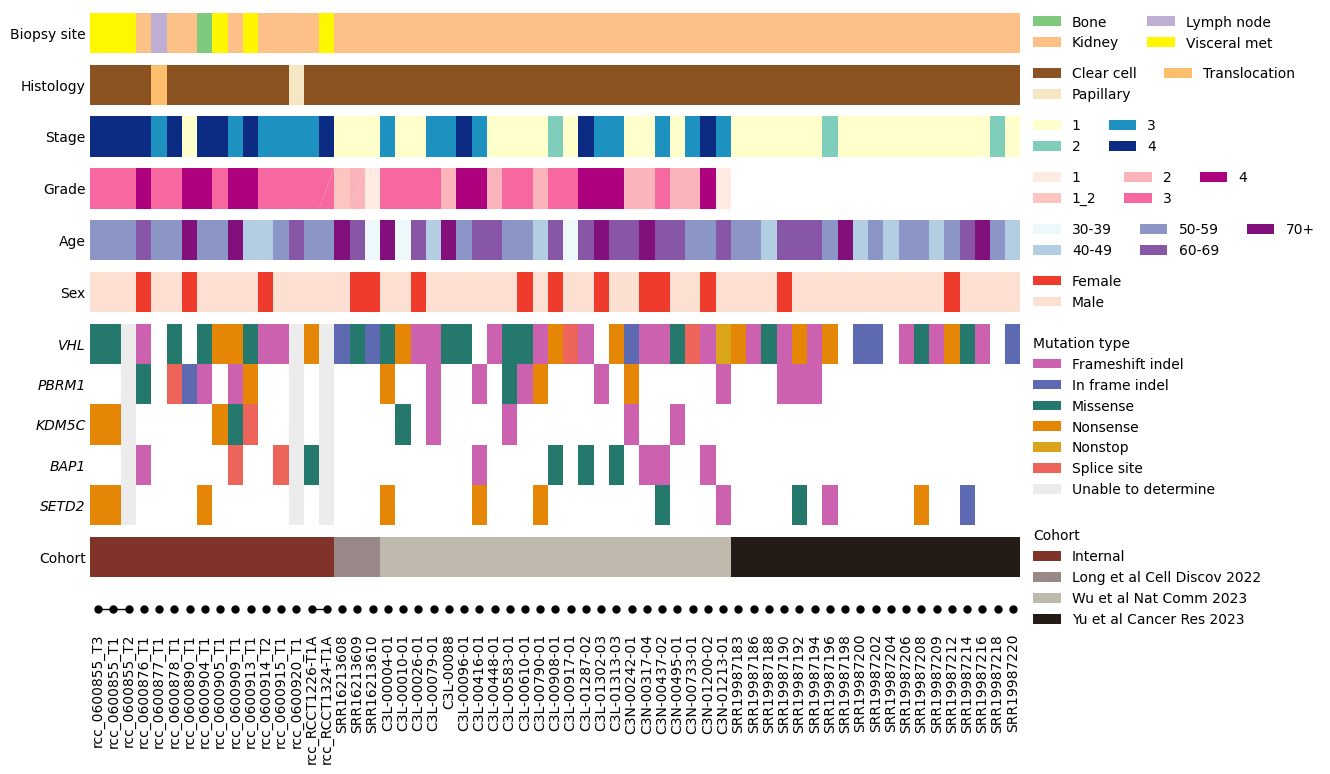

In [78]:
unified_comut = comut.CoMut()
unified_comut.samples = metadata.sort_values(['cohort', 'participant'])['biopsy'].unique()
unified_comut.add_sample_indicators(indicators, name = 'Same patient', plot_kwargs = indicator_kwargs)

unified_comut.add_categorical_data(cohort, name = 'Cohort', mapping = cohort_mapping)

unified_comut.add_categorical_data(mut_df, name = 'Mutation type', category_order = mut_order,
                                    mapping = mut_mapping, tick_style = 'italic')
# add continuous data
unified_comut.add_categorical_data(sex, name = 'Sex', mapping = sex_mapping)
unified_comut.add_categorical_data(ages, name = 'Age at diagnosis', mapping = age_mapping)
unified_comut.add_categorical_data(grade, name = 'Grade', mapping = grade_mapping)
unified_comut.add_categorical_data(stage, name = 'Stage', mapping = stage_mapping)
unified_comut.add_categorical_data(hist, name = 'Histology', mapping = hist_mapping)
unified_comut.add_categorical_data(biopsy, name = 'Biopsy site', mapping = biopsy_mapping)
unified_comut.plot_comut(figsize = (12,8))

unified_comut.add_axis_legend(name = 'Biopsy site', bbox_to_anchor = (1, 1.25), ncol = 2)
unified_comut.add_axis_legend(name = 'Histology', bbox_to_anchor = (1, 1.25), ncol = 2)
unified_comut.add_axis_legend(name = 'Stage', bbox_to_anchor = (1, 1.25), ncol = 2)
unified_comut.add_axis_legend(name = 'Grade', bbox_to_anchor = (1, 1.25), ncol = 3)
unified_comut.add_axis_legend(name = 'Age at diagnosis', bbox_to_anchor = (1, 1.25), ncol = 3)
unified_comut.add_axis_legend(name = 'Sex', bbox_to_anchor = (1, 1.25), ncol = 1)
unified_comut.add_axis_legend(name = 'Mutation type', bbox_to_anchor = (1, 1), ncol = 1, title = 'Mutation type')
unified_comut.add_axis_legend(name = 'Cohort', bbox_to_anchor = (1, 1.5), ncol = 1, order = ['Internal', 'Long et al Cell Discov 2022', 'Wu et al Nat Comm 2023', 'Yu et al Cancer Res 2023'], title = 'Cohort')

# Figure 1C: CNV heatmap

R environment from here on. 

In [8]:
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(patchwork)
library(hdf5r) 
library(future)
library(RColorBrewer)
library(dplyr)
library(Matrix)
library(BSgenome.Hsapiens.UCSC.hg38)
library(glue)
library(harmony)
library(matrixStats)
library(scales)
library(biomaRt)
library(curl)
library(goseq)
library(httr)
library(Scillus)
library(TFBSTools)
library(JASPAR2020)
library(ggridges)
library(ggrepel)
library(ggsignif)
library(qusage)
library(tidyverse)
httr::set_config(config(ssl_verifypeer = 0L))
set.seed(1234)

setwd('data/inhouse_wu_long_yu')

In [9]:
# cell metadata, same as table S1 sheet B 
metadata = read.table('allcells/seurat_obj/metadata_integrated_allcohorts_seuratobj_geneactivity_lsi_metadata_qc_motifs_annotated_detailed.txt', check.names = F, sep = '\t')
metadata = metadata %>% filter(broad_celltype_excluded != 'Excluded')                                                          

Create seurat object that has chromosome arm-level copy number information from CopyScAT per cell (in an assay) so that we can plot this with Scillus. 

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from copyscat to copyscat_"
`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



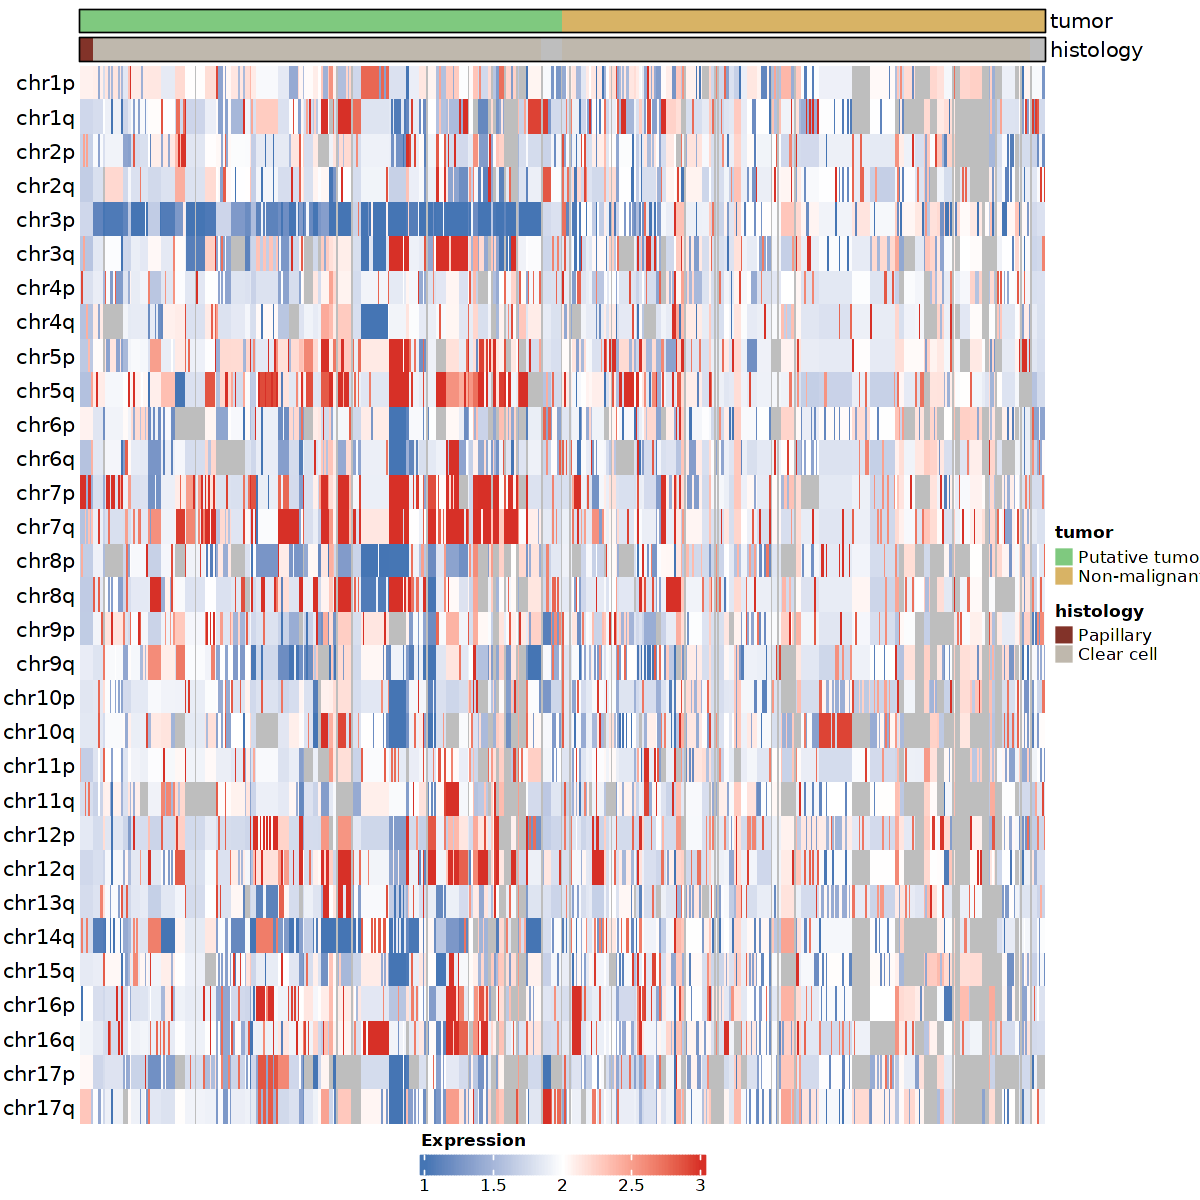

In [20]:
# Define chromosome arms to exclude from plot
exclude_chroms <- c('chr21p', 'chr22p', 'chrYq', 'chrXq', 'chrXp', 
                    'chr18p', 'chr18q', 'chr19p', 'chr19q', 'chr20p', 'chr20q', 'chr21q', 'chr22q')

# Select only the desired chromosome arms
chrom_names <- setdiff(grep('chr', colnames(metadata), value = TRUE), exclude_chroms)

# Sort chromosome column names in logical order (e.g., chr1p, chr1q, chr2p, chr2q)
chrom_df <- data.frame(chrom_names) %>%
  tidyr::separate(chrom_names, sep = 'chr', into = c('x', 'chrom_arm')) %>%
  mutate(
    arm = stringr::str_sub(chrom_arm, -1, -1),
    chrom = as.numeric(stringr::str_extract(chrom_arm, "^\\d+"))
  ) %>%
  arrange(chrom, arm) %>%
  tidyr::drop_na()

chrom_df$full <- paste0('chr', chrom_df$chrom, chrom_df$arm)

# Select and transpose the ordered CopyScat columns
cnv_assay <- metadata %>%
  dplyr::select(all_of(chrom_df$full)) %>%
  t() %>%
  as.data.frame(check.names = FALSE)

# Create Seurat object and add metadata
assay_obj <- CreateAssayObject(counts = as.matrix(cnv_assay))
copyscat_obj <- CreateSeuratObject(assay_obj, assay = 'copyscat')
copyscat_obj <- AddMetaData(copyscat_obj, metadata = metadata)

# Add scaled data for non-scaled heatmap plotting
copyscat_obj@assays$copyscat@scale.data <- as.matrix(copyscat_obj@assays$copyscat@data)

# Add and factorize metadata variables
copyscat_obj$tumor <- factor(
  ifelse(copyscat_obj$broad_celltype_excluded == 'Tumor', 'Putative tumor', 'Non-malignant'),
  levels = c('Putative tumor', 'Non-malignant')
)

copyscat_obj$histology <- factor(
  copyscat_obj$histology,
  levels = c('XpTranslocation', 'Papillary', 'Clear cell')
)

Idents(copyscat_obj) <- 'tumor'

# Define colors for the heatmap
histo_colors <- c('#823329', '#BFB8AD', '#998888', '#241a16')
sample_colors <- colorRampPalette(brewer.pal(8, "Accent"))(14)

# Plot heatmap
options(repr.plot.width = 10, repr.plot.height = 10)
plot_heatmap(
  hm_limit = c(1, 2, 3),
  subset(copyscat_obj, downsample = 10000),
  sort_var = c('tumor', 'histology'),
  markers = row.names(cnv_assay),
  anno_var = c('tumor', 'histology'),
  anno_colors = list(
    c(sample_colors[1], '#d8b365'),
    histo_colors
  )
)

# Figure 1E: Broad cell type UMAP

In [2]:
obj = readRDS('allcells/seurat_obj/integrated_allcohorts_seuratobj_geneactivity_lsi_metadata_qc_motifs_annotated_detailed.rds')
obj$ATAC = NULL 

In [3]:
levels = c('Tumor','CD8 T cell','T-helper','T-reg','NK', 'Plasma cell', 'B cell', 
 'TAM','Monocyte','MoDC','cDC','Endothelial','Perivascular cell','Fibroblast')
# Convert the column to a factor with the specified levels
obj$broad_celltype_excluded <- factor(obj$broad_celltype_excluded, levels = c('Excluded',levels))

Warning message in brewer.pal(14, "Accent"):
"n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
"


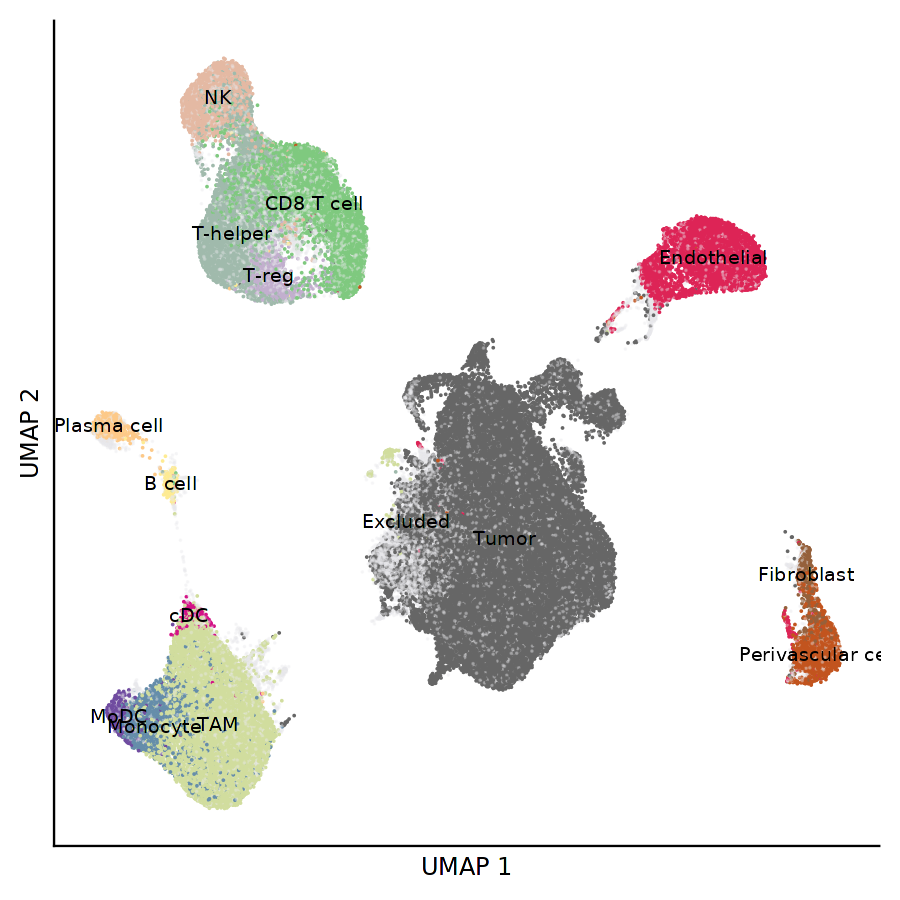

In [122]:
excluded = alpha(c('#E8E9EB'), 0.3)

sample_cols <- colorRampPalette(brewer.pal(14, "Accent"))(14)
sample_cols = c(sample_cols[14], sample_cols[-14])
options(repr.plot.width=7.5, repr.plot.height=7.5)
DimPlot(obj, label = TRUE, group.by = 'broad_celltype_excluded', cols = c(excluded,sample_cols), raster = FALSE, reduction = 'UMAP_50dims') + theme(plot.title = element_blank(), legend.text = element_text(size = 14), axis.text = element_blank(), axis.ticks = element_blank()) +
xlab('UMAP 1') + ylab('UMAP 2') + NoLegend()

# Figure 1D: Non-tumor broad cell type gene activity heatmap

Run FindMarkers on QC-passing non-tumor broad cell types. Results in Table S1 sheet C. 

In [4]:
filtered_obj = subset(obj, subset = broad_celltype_excluded != 'Excluded')
non_tumor = subset(filtered_obj, subset = broad_celltype_excluded != 'Tumor')

DefaultAssay(non_tumor) = 'RNA'
Idents(non_tumor) = 'broad_celltype_excluded'
differential_geneactivity_celltypes = FindAllMarkers(non_tumor, min.pct = 0.1, test.use = 'LR', latent.vars = 'nCount_ATAC', max.cells.per.ident = 1000, logfc.threshold = 0.1)


Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_50dims_ to umap50dims_"


Order FindMarkers results by cell type order that we will plot by

In [59]:
# Define order that I want broad cell types to be plotted in the heatmap
levels = c('Tumor','CD8 T cell','T-helper','T-reg','NK', 'Plasma cell', 'B cell', 
 'TAM','Monocyte','MoDC','cDC','Endothelial','Perivascular cell','Fibroblast')
differential_geneactivity_celltypes$cluster = factor(differential_geneactivity_celltypes$cluster, levels = levels[-1])
differential_geneactivity_celltypes = differential_geneactivity_celltypes %>% arrange(cluster)
differential_geneactivity_celltypes %>%
    group_by(cluster) %>%
    top_n(n = 100, wt = avg_log2FC) -> top10

Add NA's between FindMarkers top 10 gene sets to give spacing in heatmap

In [126]:
# Split df$gene into a list of vectors, each with 100 elements
gene_chunks <- split(top10$gene, ceiling(seq_along(top10$gene)/100))
# Add 10 NAs after each chunk
gene_chunks_with_NA <- lapply(gene_chunks, function(chunk) c(chunk, rep(NA, 10)))
# Combine the list back into a single vector
gene_vector_with_NA <- unlist(gene_chunks_with_NA)
# Remove the NAs after the last chunk
gene_vector_with_NA <- head(gene_vector_with_NA, -10)
wna = unname(gene_vector_with_NA)

Calculate average accessibility per broad cell type

In [64]:
DefaultAssay(non_tumor) = 'RNA'
non_tumor_avg = AverageExpression(non_tumor, return.seurat = T)
non_tumor_avg$celltype = Idents(non_tumor_avg)
non_tumor_avg$celltype = factor(non_tumor_avg$celltype, levels = levels[-1])
Idents(non_tumor_avg) = 'celltype'

Centering and scaling data matrix



Plot

png 
  2

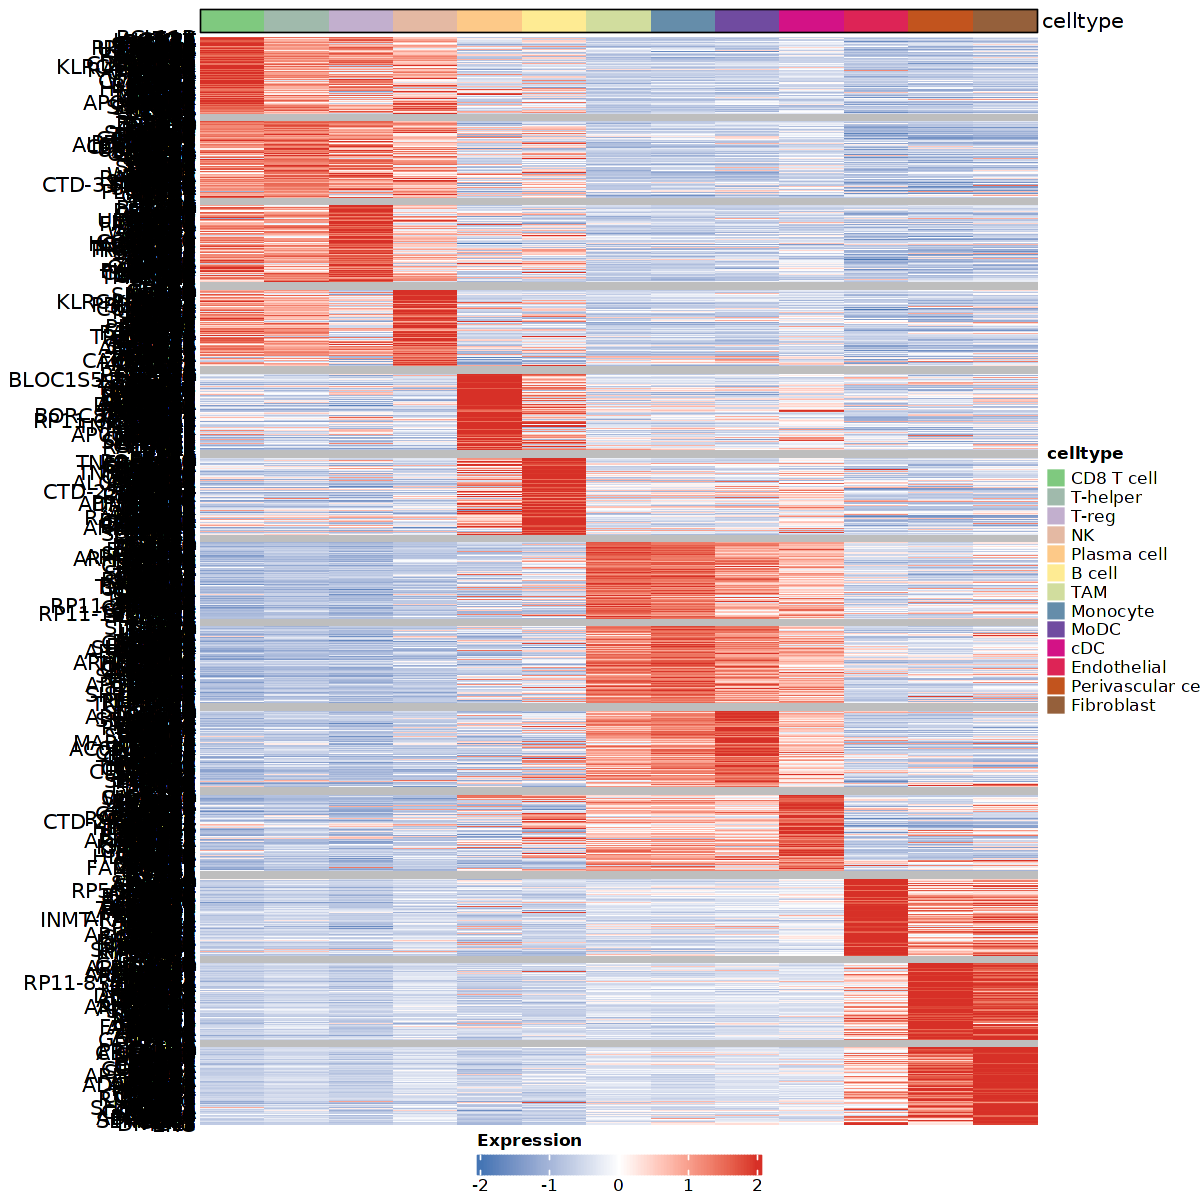

In [128]:
options(repr.plot.width=10, repr.plot.height=10)
sample_cols <- colorRampPalette(brewer.pal(14, "Accent"))(14)
plot_heatmap(non_tumor_avg, markers = wna,anno_var = 'celltype',
             anno_colors = list(sample_cols), sort_var = 'celltype')